### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量**：两个组的任务条件不同，我们设定Congruent组为一致文字条件，Incongruent组为不一致文字条件。  
**因变量**：计量两组说出同等大小的列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**回答**：首先因为只已知样本，所以使用t检验；其次这两个样本数据是同一组参与者在不同条件下获取的，所以它们是相关样本，因此采用配对t检验假设集：  
>μ_con表示一致文字条件下读出墨色时间的总体均值  
μ_incon表示不一致文字条件下读出墨色时间的总体均值  

首先对样本数据进行描述性统计分析，来确定零假设与对立假设：

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#导入样本数据集
data = pd.read_csv('stroopdata.csv')

In [17]:
data.head(2)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741


In [18]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


由上面的描述性统计可以看出Incongruent的测试时间平均值大于Congruent测试平均值，所以我如下设定两个假设：  
**零假设**：克鲁普效应不存在，对应的就是第一组平均值=第二组平均值，即：μ_con=μ_incon  
**对立假设**：克鲁普效应存在，根据上面描述性统计结果，假设颜色和文字不同的情况下，人们都反应时间会变长，即：μ_con<μ_incon

为了后面计算更为简便，对零假设和对立假设进行数学等价变换：  
**零假设**：μ_con - μ_incon = 0  
**对立假设**：μ_con - μ_incon < 0  
  
在相关配对检验中，我们取两组实验数据的差值成立'Difference'列，简单来说，通过这个差值，我们将之前两组相关样本数据集转换成一个独立样本数据集，以便后面计算取用：

In [11]:
data_diff = data

In [12]:
data_diff['Difference'] =data_diff['Congruent'] - data_diff['Incongruent']
data_diff.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


因为在对立假设中我们设置μ_con<μ_incon，有小于号，所以为单尾假设中的左尾。  
**综上所述**：该项目为相关样本t检验单尾检验中的左尾（α = 0.05）。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [19]:
# 对数据进行描述性统计
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**集中趋势测量**：  
均值：x_con = 14.051125 ； x_incon = 22.015917  
中位数：median_con = 14.356500 ； median_incon = 14.356500  
  
**变异测量**：  
范围：最大值和最小值之间的差。 Xmax - Xmin   
range_con=13.698 ; range_incon=19.568  
标准差：std_con=3.559358 ; std_incon = 4.797057  


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [34]:
# 绘制两组的柱状图
fg = plt.Figure(figsize = (15,10))
ax = fg.add_subplot(1,1,1)
data.plot(kind = 'bar', ax=ax)

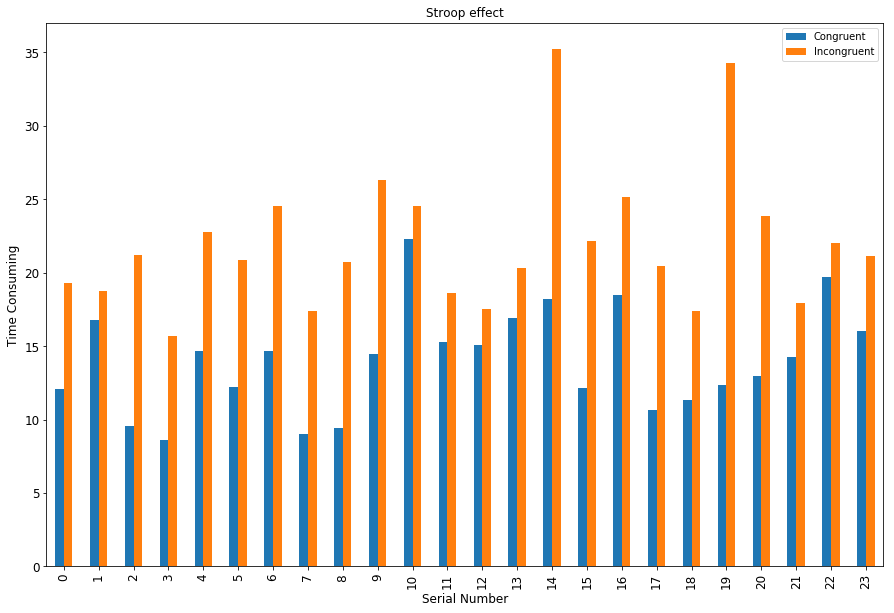

In [42]:
ax = data.plot(kind='bar', title ="Stroop effect",figsize=(15,10),legend=False, fontsize=12)
ax.set_xlabel("Serial Number",fontsize=12)
ax.set_ylabel("Time Consuming",fontsize=12)
plt.legend( labels = ['Congruent','Incongruent'])

从图中可以清晰的看出： Incongruent条件下的时间全部都高于Congruent条件下的阅读时间。有部分数据甚至超出已被，如果有更多数据甚至可以研究当颜色和内容怎样不同是Incongruent超出时间更多

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [20]:
# 导入统计模块
from scipy import stats

In [21]:
#输出假设检验的t值和双尾检验的p值
t, p_twoTail = stats.ttest_rel(data['Congruent'],data['Incongruent'])
print('t值=', t, '，p值=', p_twoTail/2)

t值= -8.020706944109957 ，p值= 2.051500292855589e-08


判断标准为准置信水平 α=0.05，由上面相关样本t检验单尾检验中的左尾p值相比较可知：  
p值远小于α，我们有理由拒绝零假设，所以统计上存在显著差异，接受对立假设，特鲁普效应存在。

In [22]:
#求置信区间
#计算t临界值：α = 0.05，单尾检验，df=23，查表可知t_ci=2.069
#在计算相关配对检验的置信区间的时候，样本平均值是指差值数据集的平均值
t_ci = 2.069
#计算数据平均值
sample_mean = data_diff['Difference'].mean()
#使用scipy计算标准误差
se = stats.sem(data_diff['Difference'])
#置信区间上限（a）和下限（b）
a = sample_mean - t_ci * se
b = sample_mean + t_ci * se
print('置信区间上限=', a, '，置信区间下限=', b)

置信区间上限= -10.019367912023053 ，置信区间下限= -5.91021542131028


In [23]:
#求效应量，效应量cohen's d的样本平均值是指这个差值数据集的平均值
#总体平均值是等于0，在相关配对检验里面，样本标准差也是差值数据集
pop_mean = 0 #差值数据对应的总体平均值是0
#差值数据集的标准差
sample_sta = data_diff['Difference'].std()
d = (sample_mean - pop_mean) / sample_sta
print('效应量d=', d)

效应量d= -1.6372199491222625


最后得出效应量为-1.67，说明数据集的平均值和总体平均值零相差1.67个样本标准差，可以看出这个效果还是比较显著。